# COGS 108 - Impact of COVID-19 Pandemic on Global Warming

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

This project analyzed the impact of the COVID-19 pandemic on global warming, focusing on greenhouse gas emissions between 2020 and 2022, and their effects on global temperature and sea level. Combining data on temperature anomalies, sea level changes, and $CO_2$ concentrations; visualizing trends of temperature anomalies, sea level changes, and $CO_2$ concentrations; and conducting hypothesis tests to determine whether or not the differences between before and during COVID-19 are statistically significant. In doing so, the analysis demonstrated that the pattern of growing $CO_2$ concentrations and sea level is, in fact, occurring.  More importantly, the pandemic did not lead to a direct reduction in emissions, it temporarily slowed the rates of global temperature increase and sea level rise. These findings underscore COVID-19 didn't lead to a short-term reduction in greenhouse gas emission and it failed to halt the momentum of global warming. In some aspects, it highlights the importance of ongoing efforts to mitigate greenhouse gas emissions and tackle the challenges posed by climate change.

# Names

- Leica Shen
- Yuxuan Wu
- Eddie Ho
- Xuewen Yang

<a id='research_question'></a>
# Research Question

How has the COVID-19 pandemic impact global warming? Specifically, how do changes in greenhouse gas emissions from 2020 to 2022 resulting from pandemic-related lockdowns impact global temperature increase and sea level rise?

<a id='background'></a>

## Background & Prior Work

> The COVID-19 pandemic has had an unprecedented impact on global economies and societies, resulting in widespread changes to daily life, business operations, and travel patterns. While this has brought many challenges, it has also had an unexpected effect on the environment, including global warming. With fewer people commuting to work, reduced air travel, and lower industrial activity, the levels of carbon emissions and other greenhouse gases have decreased significantly in many parts of the world. As the world begins to recover from the pandemic and returns to some semblance of normalcy, it is important to assess the long-term impact of these changes on the environment and climate change.
>
> In this context, we are exploring how the COVID-19 pandemic affects the environment and climate change. We will be comparing and examining the data before the pandemic begins, and during the pandemic. We will also be comparing and examining the data after the pandemic ends.
>
> Several studies have examined the effect of the COVID-19 pandemic on greenhouse gas emissions and global warming. One study published in the journal [^Nature Climate Change] estimated that global carbon dioxide (CO2) emissions declined by 17% during the peak of the pandemic in early April 2020 compared to the same period in 2019. The study also found that daily CO2 emissions decreased by up to 26% in individual countries.
>
> Previous studies have reported considerable reductions in greenhouse gas emissions during the pandemic, with one study published in Nature Climate Change suggesting a 17% decline in global carbon dioxide (CO2) emissions at the pandemic peak in April 2020 compared to the same period in 2019. 
>
> However, the same studies warn that these effects may be temporary and limited, with emissions expected to rebound as economies recover and travel resumes. Our project intends to examine the correlation between these changes and their impact on global warming.
>
> This project aims to assess the long-term implications of these changes on global warming, specifically global temperature increase and sea level rise.

### Citations & Links:

- [^Nature Climate Change]: Le Quéré, C., Peters, G.P., Friedlingstein, P. et al. Fossil CO2 emissions in the post-COVID-19 era. Nat. Clim. Chang. 11, 197–199 (2021). https://doi.org/10.1038/s41558-021-01001-0
- [^Geophysical Research Letters]: Li, X., Bei, N., Wu, J., Liu, S., Wang, Q., Tian, J., et al. (2022). The heavy particulate matter pollution during the COVID-19 lockdown period in the Guanzhong Basin, China. Journal of Geophysical Research: Atmospheres, 127, e2021JD036191. https://doi.org/10.1029/2021JD036191

# Hypothesis


**Hypothesis**: We hypothesize that the COVID-19 pandemic, which led to significant reductions in human activities (thus reduction of greenhouse gas emissions), will have a temporary slowing effect on global temperature increase and sea level rise.

Our hypothesis is founded on previous research findings that suggest a strong correlation between greenhouse gas emissions and both global temperature increase and sea level rise. Consequently, we anticipate that the decrease in emissions during pandemic-related lockdowns and reduced economic activity will lead to a temporary slowing of these environmental phenomena.

# Dataset(s)

**Dataset 1**
- Dataset Name: global_land_and_ocean_temp_anomalies
- Link to the dataset: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/all/1/1900-2023
- Number of observations: 1480

Global temperature anomalies for land and ocean from 01/1900 to 04/2023, compared to a baseline climatology from 1901-2000.

**Dataset 2**
- Dataset Name: Change_in_Mean_Sea_Levels
- Link to the dataset: https://climatedata.imf.org/datasets/b84a7e25159b4c65ba62d3f82c605855/explore
- Number of observations: 1608

Change in average sea levels across different regions of the world, measured in millimeters and derived from satellite radar altimeter measurements of sea level. The time-series data spans from 12/17/1992 to 8/10/2022, with 3/4 data points available for each month. 

**Dataset 3**
- Dataset Name: Atmospheric_CO2_Concentrations
- Link to the dataset: https://climatedata.imf.org/datasets/9c3764c0efcc4c71934ab3988f219e0e/explore
- Number of observations: 1548

Monthly measurements of global atmospheric carbon dioxide ($CO_2$) concentrations are provided as dry air mole fractions in parts per million (ppm), representing the ratio of $CO_2$ molecules to the total number of molecules in the air excluding water vapor. Dataset spans from 3/1958 to 2/2023.

### Combining Datasets

We plan to cleanse each dataset first, then we will combine these three datasets into one data frame.

We will first make these three datasets have same time frame from 1992 to 2022 since the shortest time span of our data has its data within 1992-2022. 
Then create a new dataset containing columns of `Year`, `Month`, `sea-level_value`, `temp_value`, `CO2_value`

Based on the `Year` and `Month` columns of the cleaned data frames generated by these three datasets, assign the corresponding values to all the other columns in the combined data frame. 


# Setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 7)
import matplotlib.dates as mdates
import statsmodels.api as sm

In [ ]:
temp_change = pd.read_csv('data/global_land_and_ocean_temp_anomalies.csv', skiprows=4)
temp_change.head()

,Year,Value
0,190001,-0.30
1,190002,-0.17
2,190003,-0.03
3,190004,-0.05
4,190005,-0.06


In [ ]:
temp_change.shape

(1480, 2)

In [ ]:
sea_level = pd.read_csv('data/Change_in_Mean_Sea_Levels.csv').drop(columns='ObjectId')
sea_level.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Measure,Date,Value
0,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Andaman Sea,D12/17/1992,-10.34
1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Arabian Sea,D12/17/1992,-18.46
2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Atlantic Ocean,D12/17/1992,-15.41
3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Baltic Sea,D12/17/1992,196.85
4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate Indicator...",Bay Bengal,D12/17/1992,3.27


In [ ]:
sea_level.shape

(35604, 12)

In [ ]:
CO2_Concentrations = pd.read_csv('data/Atmospheric_CO2_Concentrations.csv').drop(columns='ObjectId')
CO2_Concentrations.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,Date,Value
0,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M03,315.70
1,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M04,317.45
2,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M05,317.51
3,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M06,317.24
4,World,NaN,WLD,Monthly Atmospheric Carbon Dioxide Concentrations,Parts Per Million,"Dr. Pieter Tans, National Oceanic and Atmosphe...",ECCA,Atmospheric Carbon Dioxide Concentrations,"Environment, Climate Change, Climate Indicator...",1958M07,315.86


In [ ]:
CO2_Concentrations.shape

(1548, 11)

# Data Cleaning

### sea_level table

1. Extract `Year` and `Month` of each observation from the `Date` column and convert them into `int` data type. \
    The `Year` and `Month` columns from the above step will be combined with only the `Measure` and `Value` columns from the `sea_level` table. \
    The resulting merged data will be stored in the `sea_level_cleaned` table.
    

In [ ]:
sea_level_cleaned = pd.merge(sea_level[['Measure', 'Value']], sea_level['Date'].str.split('D', expand=True)[1].str.split('/', expand=True)[[0,2]].rename(columns={0:'Month', 2:'Year'}), left_index=True, right_index=True)
sea_level_cleaned['Year'] = sea_level_cleaned['Year'].astype(int)
sea_level_cleaned['Month'] = sea_level_cleaned['Month'].astype(int)
sea_level_cleaned.head()

,Measure,Value,Month,Year
0,Andaman Sea,-10.34,12,1992
1,Arabian Sea,-18.46,12,1992
2,Atlantic Ocean,-15.41,12,1992
3,Baltic Sea,196.85,12,1992
4,Bay Bengal,3.27,12,1992


2. Group by `Year` and `Month`, get the mean of `Value` of the `sea_level_cleaned` table. \
    The resulting table will be stored in the `mean_sea_level_by_month` table. \
    

In [ ]:
mean_sea_level_by_month = sea_level_cleaned.groupby(['Year', 'Month'])[['Value']].mean().reset_index().sort_values(['Year', 'Month']) 
mean_sea_level_by_month.head()

,Year,Month,Value
0,1992,12,4.265600
1,1993,1,-14.385067
2,1993,2,-31.307733
3,1993,3,-39.215733
4,1993,4,-49.520400


3. Group by `Measure` and `Year`, get the mean value of `Value` of the `sea_level_cleaned` table. \
    The resulting table will be stored in the `mean_sea_level_by_sea` table.

In [ ]:
mean_sea_level_by_sea = sea_level_cleaned.groupby(['Measure', 'Year'])[['Value']].mean().reset_index().sort_values(['Measure', 'Year']) 
mean_sea_level_by_sea.head()

,Measure,Year,Value
0,Adriatic Sea,1992,-21.360000
1,Adriatic Sea,1993,-47.668824
2,Adriatic Sea,1994,-23.842353
3,Adriatic Sea,1995,-19.478750
4,Adriatic Sea,1996,2.120303


### temp_change table

1. Create `temp_change_cleaned` data frame to store the cleaned data. 
2. Extract `Year` column from the original `temp_change` data frame, convert those dates to strings. 
3. Use string slicing to retrieve `Year` and `Month` from the dates in the uncleaned data frame, converts them to int, and then assign them to the corresponding `Year` and `Month` column of the cleaned `temp_change_cleaned` data frame. 
4. Sort the cleaned data in `temp_change_cleaned` by the `Year` and `Month` of the data. 

In [ ]:
temp_change_cleaned = temp_change.copy()
time = temp_change['Year'].astype(str)
temp_change_cleaned['Year'] = time.str[:4].astype(int)
temp_change_cleaned['Month'] = time.str[4:].astype(int)
temp_change_cleaned = temp_change_cleaned.groupby(['Year', 'Month']).mean().reset_index().sort_values(['Year', 'Month']) 
temp_change_cleaned.head()

,Year,Month,Value
0,1900,1,-0.30
1,1900,2,-0.17
2,1900,3,-0.03
3,1900,4,-0.05
4,1900,5,-0.06


### CO2_Concentrations table

1. Create `CO2_cleaned` dataframe to store the cleaned data.
2. Extract `Date` column from the original `CO2_cleaned` dataframe, use string slicing to retrieve `Year` and `Month`, and then assign them to the corresponding `Year` and `Month` column of the cleaned `CO2_cleaned` dataframe.
3. Drop rows where `Unit` = `Percent` as we won't be performing on those records.
4. Sort the cleaned data in `CO2_cleaned` by `Year` and `Month` of the data.

In [ ]:
# Extract the year and month from the date column
CO2_cleaned = (
    CO2_Concentrations
    .assign(Year=CO2_Concentrations['Date'].str.split('M').map(lambda x: x[0]).astype(int),
            Month=CO2_Concentrations['Date'].str.split('M').map(lambda x: x[1]).astype(int))
    .drop(columns=['Date'])
)

# Remove the percent values
CO2_cleaned = CO2_cleaned[CO2_cleaned['Unit'] != 'Percent']

# Sort the values by year and month
CO2_cleaned = (
    CO2_cleaned
    .sort_values(['Year', 'Month'])
    .get(['Year', 'Month', 'Value'])
)

CO2_cleaned

,Year,Month,Value
0,1958,3,315.70
1,1958,4,317.45
2,1958,5,317.51
3,1958,6,317.24
4,1958,7,315.86
...,...,...,...
1538,2022,10,415.78
1540,2022,11,417.51
1542,2022,12,418.95
1544,2023,1,419.47


### Merging data sets

Our plan for combining these datasets: 
1. Merge the first dataset Temp Anomalies with the second dataset Change in Mean Sea Levels on the Year / Month columns.

2. Merge this combined dataset with the third dataset Atmospheric CO2 Concentrations again on the Year / Month columns.

In [ ]:
# Merge the two dataframes
mean_sea_level_by_month = mean_sea_level_by_month.rename(columns={'Value': 'Sea_Level'})
temp_change_cleaned = temp_change_cleaned.rename(columns={'Value': 'Temp_Anomaly'})
temp_sealevel_df = pd.merge(mean_sea_level_by_month, temp_change_cleaned, how='inner', on=['Year', 'Month'])
temp_sealevel_df.head()

,Year,Month,Sea_Level,Temp_Anomaly
0,1992,12,4.265600,0.22
1,1993,1,-14.385067,0.34
2,1993,2,-31.307733,0.39
3,1993,3,-39.215733,0.38
4,1993,4,-49.520400,0.36


The resulting merged data frame will have columns of `Year`, `Month`, `sea-level_value`, `temp_value`, `CO2_value`：

In [ ]:
CO2_cleaned = CO2_cleaned.rename(columns={'Value': 'CO2_Concentration'})
merged_df = pd.merge(temp_sealevel_df, CO2_cleaned, how='inner', on=['Year', 'Month'])
merged_df.head()

,Year,Month,Sea_Level,Temp_Anomaly,CO2_Concentration
0,1992,12,4.265600,0.22,355.68
1,1993,1,-14.385067,0.34,357.10
2,1993,2,-31.307733,0.39,357.42
3,1993,3,-39.215733,0.38,358.59
4,1993,4,-49.520400,0.36,359.39


# Data Analysis & Results (EDA)

## $CO_2$ Concentration

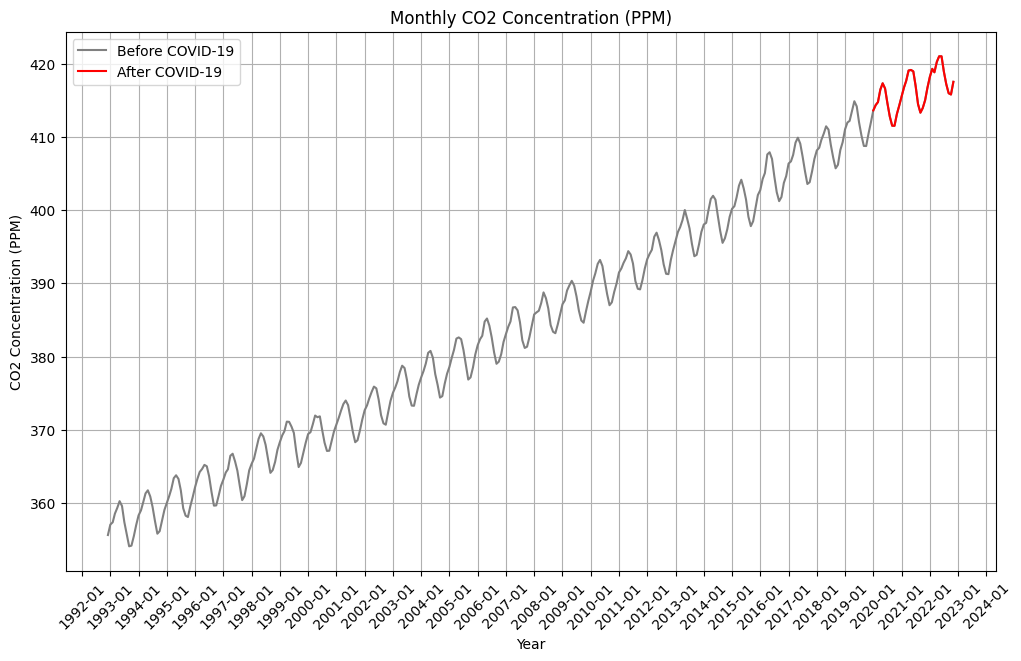

In [ ]:
# Create a boolean mask for dates after 2019-12-01
mask = merged_df['Year_Month'] > pd.to_datetime('2019-12-01')

plt.plot(merged_df['Year_Month'], merged_df['CO2_Concentration'], label='Before COVID-19', color='gray')

# Use boolean mask to highlight data after Covid-19 outbreak
plt.plot(merged_df['Year_Month'][mask], merged_df['CO2_Concentration'][mask], label='After COVID-19', color='red')

plt.title('Monthly CO2 Concentration (PPM)')
plt.xlabel('Year')
plt.ylabel('CO2 Concentration (PPM)')
plt.legend()

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

This line graph illustrates the monthly $CO_2$ concentration in parts per million (ppm) over time on monthly basis. 

Notably, the graph reveals a distinct pattern characterized by a periodic Z-shape staircase trend.

At the beginning of each year, there is a noticeable increase in $CO_2$ concentration, represented by an upward trend in the graph. This upward trend is followed by a downward trend in the middle of the year and after that there is another upward trend towards the end of the year.

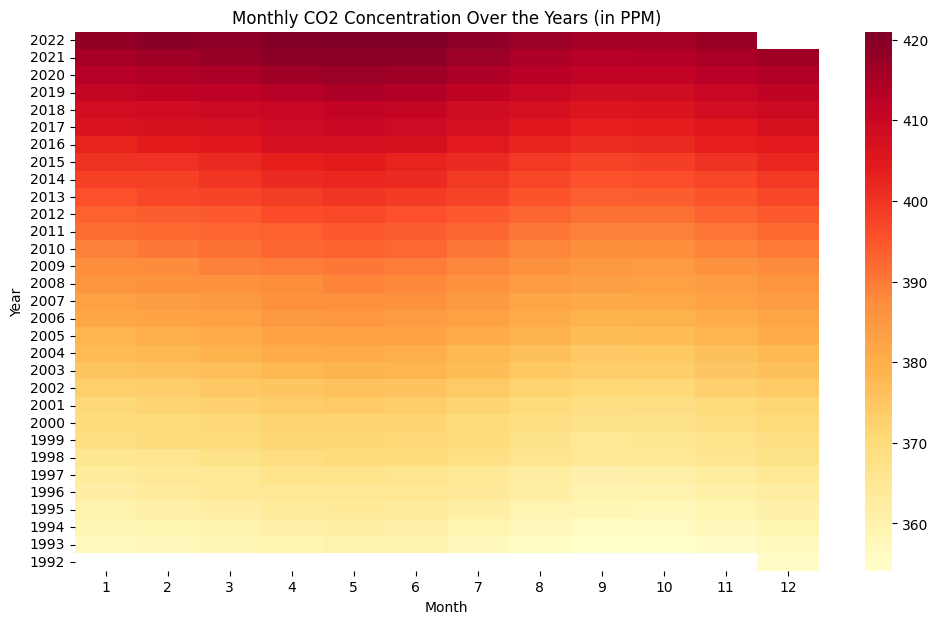

In [ ]:
# Create a new DataFrame with years as index, months as columns, and CO2 concentration as values
heatmap_data = merged_df.pivot(index='Year', columns='Month', values='CO2_Concentration')
heatmap_data = heatmap_data.sort_index(axis=0, ascending=False)

# Draw the heatmap for monthly CO2 concentration
sns.heatmap(heatmap_data, cmap='YlOrRd')

plt.title('Monthly CO2 Concentration Over the Years (in PPM)')
plt.xlabel('Month')
plt.ylabel('Year')

plt.show()

The heatmap illustrates the $CO_2$ concentration in parts per million (ppm) for each month of the years from 1992 to the present. The x-axis represents the months, while the y-axis shows the years in descending order, so the top of the graph represents the most recent data, while the bottom represents the earlier years. Also note that the color intensity signifies the $CO_2$ concentration. Darker shades indicate higher CO2 concentration and lighter ones represent lower concentrations.

The heatmap reveals a persistent trend of increasing $CO_2$ concentration over the years. Notably, the color intensity progressively darkens towards the top of the graph, which signifies a rising trend in $CO_2$ concentration. We observe that despite the global pandemic and consequent reduction in human activities, the $CO_2$ concentration does not show any sign of decrease. This observation is consistent with the findings of the graphs above, all of them are showing a steady increase in $CO_2$ concentration over the years. 

Here are two possible explanations for this observation:
1. Momentum of $CO_2$ emissions: The COVID-19 pandemic led to a reduction in human activities and consequently, $CO_2$ emissions. However, this reduction didn't mean an absolute halt. 
2. Persistence of $CO_2$ in the atmosphere: $CO_2$ persists in the atmosphere for a long time once it's released. Even with a significant short-term reduction in emissions, the concentration of $CO_2$ doesn't decrease quickly. 

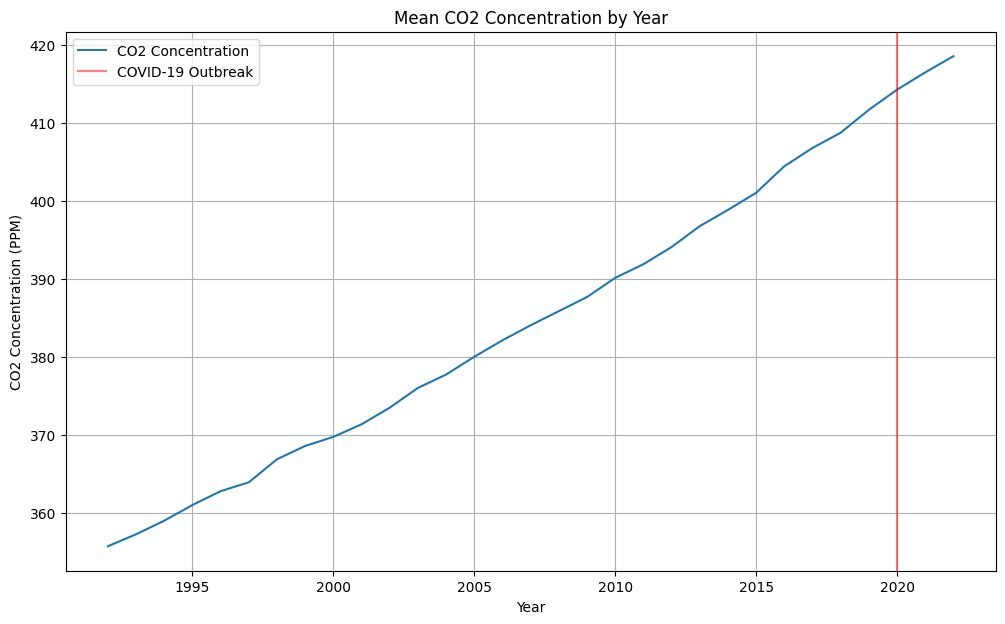

In [ ]:
merged_df.groupby('Year')['CO2_Concentration'].mean().plot(label='CO2 Concentration')

plt.xlabel('Year')
plt.ylabel('CO2 Concentration (PPM)')
plt.title('Mean CO2 Concentration by Year')
plt.axvline(x=2020, color='red', alpha=0.5, label='COVID-19 Outbreak')
plt.legend()

plt.grid(True)
plt.show()

The line plot shows that $CO_2$ emissions have been increasing over the years. This indicates that despite the pandemic (2019-2022), there hasn't been a significant decrease in $CO_2$ emissions. This observation contradicts our initial anticipation of a decrease in emissions during the pandemic period.

Thus, instead of analyzing the impact of the **decrease** of $CO_2$ concentration to the global temperature increase and sea level rise, we will analyze the impact of **overall** $CO_2$ concentration to the global temperature increase and sea level rise. 

Starting by checking their correlations.

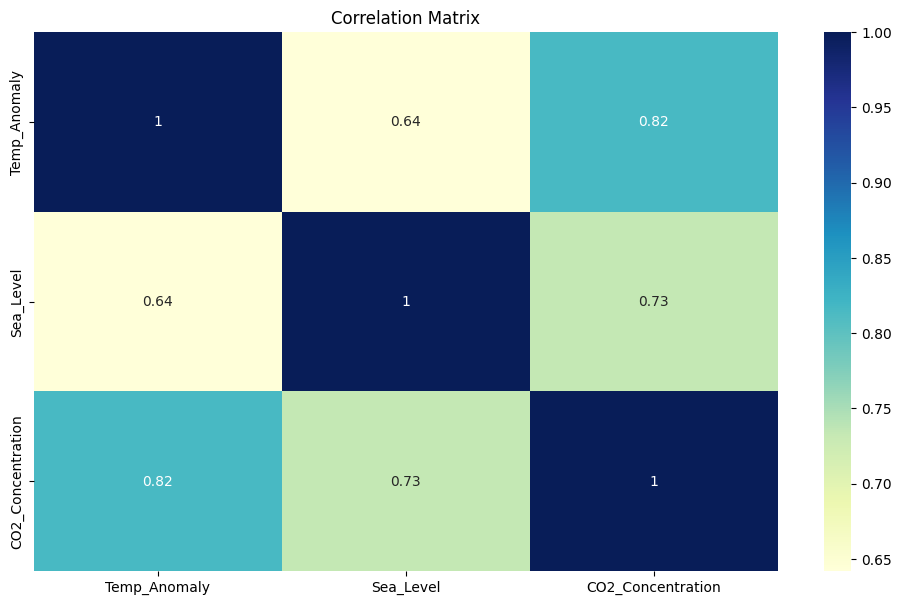

In [ ]:
# Correlation analysis
correlation_matrix = merged_df[['Temp_Anomaly', 'Sea_Level', 'CO2_Concentration']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix reveals that there is a strong positive correlation between $CO_2$ concentration and temperature anomalies, with a correlation coefficient of 0.82. This indicates a significant and positive relationship between the two variables. Similarly, there is a relatively strong positive correlation of 0.73 between $CO_2$ concentration and the average change in sea level.

However, it's crucial to note that correlation alone does not imply causation. While the high correlation coefficients suggest a relationship between the variables, further analysis is required to establish any causal connections or identify underlying factors. Thus, we are going to do more analysis below. 

## Temperature Anomly

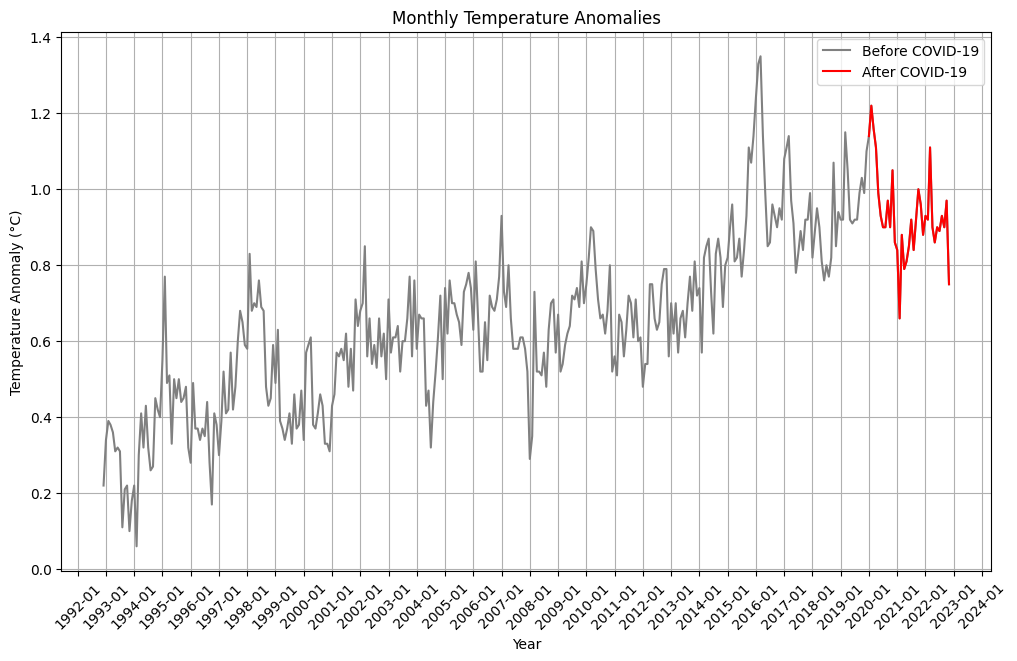

In [ ]:
# Temperature Anomly per Year
# Create a boolean mask for dates after 2019-12-01
mask = merged_df['Year_Month'] > pd.to_datetime('2019-12-01')

# Plot all data with a lighter color
plt.plot(merged_df['Year_Month'], merged_df['Temp_Anomaly'], label='Before COVID-19', color='gray')

# Use boolean mask to plot data after 2019-12-01 with a different color
plt.plot(merged_df['Year_Month'][mask], merged_df['Temp_Anomaly'][mask], label='After COVID-19', color='red')

plt.title('Monthly Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

The monthly temperature anomalies plot indicates a general upward trend in temperature anomalies. Prior to the COVID-19 outbreak, the gray line representing temperature anomalies exhibited fluctuations throughout the year but showed a consistent upward trajectory. However, after the outbreak, there was a noticeable change in the trend. The temperature anomalies in the post-COVID-19 period displayed a slower rate of increase and a more flattened pattern. Based on these observations, it suggests that the COVID-19 pandemic might have had an impact on temperature anomalies.

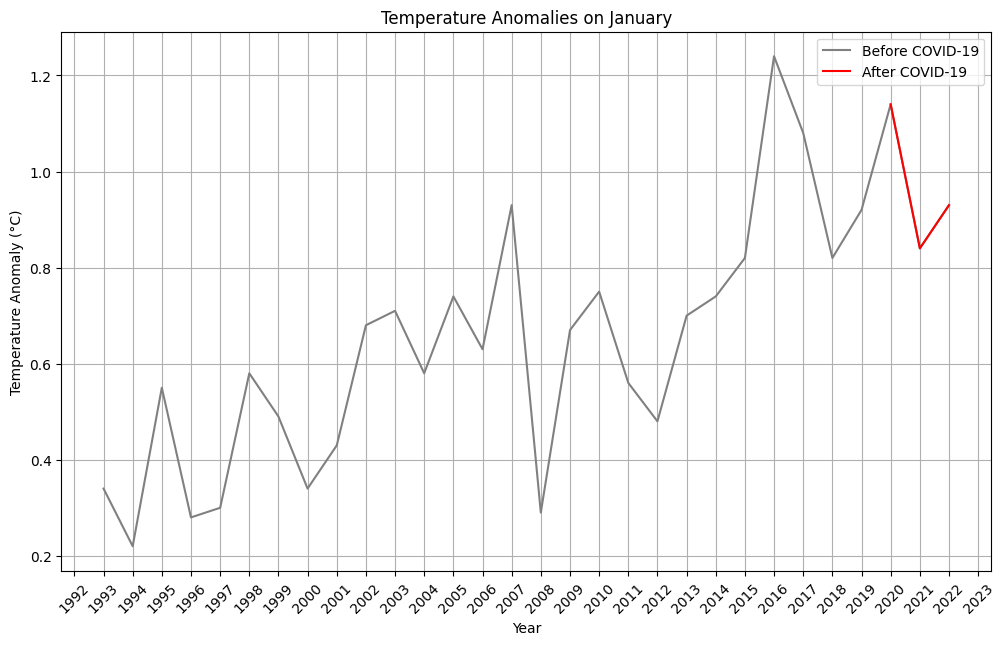

In [ ]:
df = merged_df[merged_df['Month'] == 1]

mask = (df['Year_Month'] > pd.to_datetime('2019-12-01')
        ) & (df['Year_Month'] < pd.to_datetime('2022-12-01'))

# Plot all data with a lighter color
plt.plot(df['Year_Month'], df['Temp_Anomaly'],
         label='Before COVID-19', color='gray')

# Use boolean mask to plot data after 2019-12-01 with a different color
plt.plot(df['Year_Month'][mask], df['Temp_Anomaly']
         [mask], label='After COVID-19', color='red')

plt.title('Temperature Anomalies on January')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

The above graph shows the temperature anomalies on January of each year from 1993 to 2022. The red line shows the temperature anomalies after the COVID-19 outbreak. We could see that the temperature anomalies after the COVID-19 outbreak are generally lower, having a lower increasing rate than the temperature anomalies from previous years before the COVID-19 outbreak.

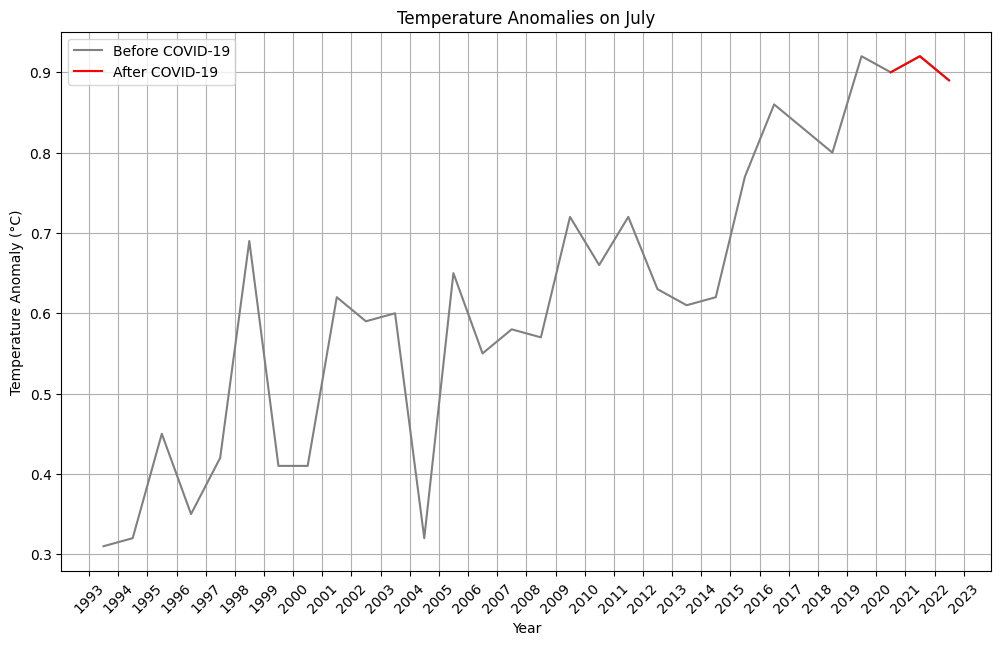

In [ ]:
df = merged_df[merged_df['Month'] == 7]

mask = (df['Year_Month'] > pd.to_datetime('2019-12-01')) & (df['Year_Month'] < pd.to_datetime('2022-12-01'))

# Plot all data with a lighter color
plt.plot(df['Year_Month'], df['Temp_Anomaly'], label='Before COVID-19', color='gray')

# Use boolean mask to plot data after 2019-12-01 with a different color
plt.plot(df['Year_Month'][mask], df['Temp_Anomaly'][mask], label='After COVID-19', color='red')

plt.title('Temperature Anomalies on July')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

The above graph shows the temperature anomalies for the month of July from 1993 to 2022. The red line shows the temperature anomalies after the COVID-19 outbreak. We could see that the temperature anomalies after the COVID-19 outbreak are generally lower, having an lower increasing rate than the temperature anomalies from previous years before the COVID-19 outbreak.

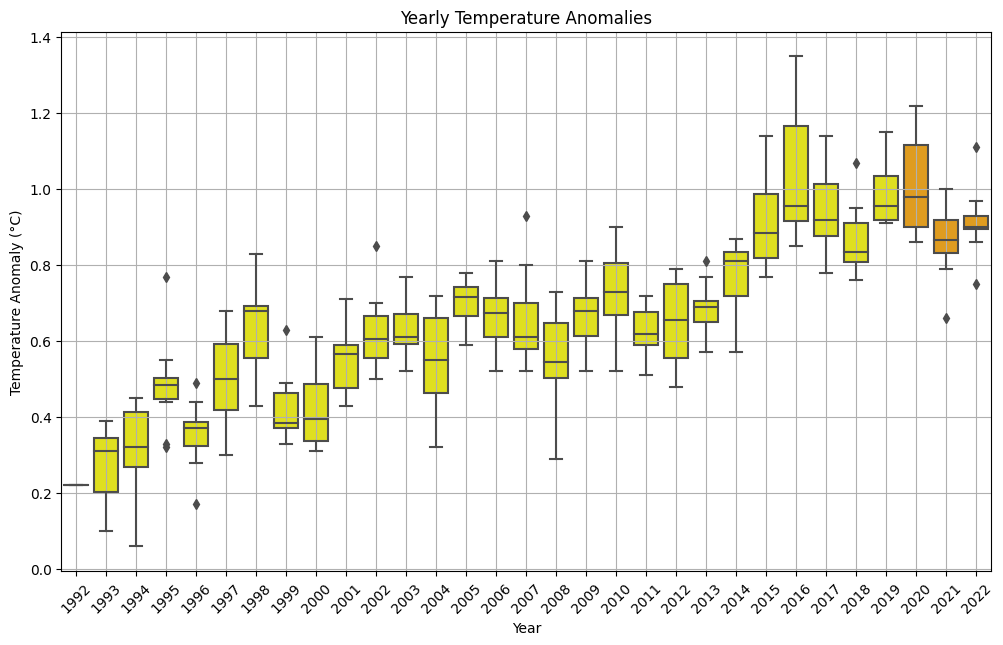

In [ ]:
# Create a palette that maps each year to a color based on whether it's before or after 2020
palette = {year: 'orange' if year >= 2020 else 'yellow' for year in merged_df['Year'].unique()}

# Create a boxplot with the custom color palette
sns.boxplot(x="Year", y="Temp_Anomaly", data=merged_df, palette=palette)

plt.title('Yearly Temperature Anomalies')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

The box plot provides insights into the distribution of temperature anomalies across different years. Prior to the COVID-19 period, the average temperature anomalies show a consistent increasing trend with some minor fluctuations. This suggests an overall rise in temperature anomalies over time.

In contrast, the temperature anomalies observed after the COVID-19 period exhibit greater stability and a flattened pattern. This indicates a potential impact of COVID-19 on temperature anomalies, leading to a more leveled trend.

Overall, the box plot highlights the contrasting patterns in temperature anomalies before and after the COVID-19 period, suggesting a potential influence of the pandemic on temperature trends.

### Hypothesis Test

To perform a hypothesis test on whether the temperature anomaly is rising or not based on the given table, we decided use a statistical test; linear regression analysis.

- **Null Hypothesis ($H_0$)**: The temperature anomaly is not rising (slope of the linear regression line is zero).
- **Alternative Hypothesis ($H_1$)**: The temperature anomaly is rising (slope of the linear regression line is non-zero).

In [ ]:
# Extracting the relevant columns
temp_anomaly_data = merged_df[['Year', 'Temp_Anomaly']]

# Perform linear regression
# Adding a constant term for the intercept
X = sm.add_constant(temp_anomaly_data['Year'])
y = temp_anomaly_data['Temp_Anomaly']
model = sm.OLS(y, X)
results = model.fit()

# Extract slope and p-value
slope = results.params['Year']
p_value = results.pvalues['Year']

# Print regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           Temp_Anomaly   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     736.4
Date:                Wed, 31 May 2023   Prob (F-statistic):           6.98e-89
Time:                        22:53:46   Log-Likelihood:                 221.61
No. Observations:                 360   AIC:                            -439.2
Df Residuals:                     358   BIC:                            -431.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.8017      1.602    -26.721      0.0

The OLS regression results provide information about the relationship between the Year predictor variable and the Temp_Anomaly dependent variable. Here's how we interpret the important statistics:

1. Coefficients: The coefficient values represent the estimated effect of the `Year` variable on the `Temp_Anomaly`. In this case, the coefficient for `Year` is **0.0217**. This means that, on average, for each unit increase in the `Year` variable, the `Temp_Anomaly` is expected to increase by **0.0217** (°C).
1. P-values: The `p-values` associated with the coefficients indicate the statistical significance of the relationship. In this case, both the constant term (const) and the `Year` variable have `p-values` less than the typical significance level of **0.05**. This suggests that both variables have a significant impact on the `Temp_Anomaly`.

In summary, based on the results, there is a significant positive relationship between the `Year` and `Temp_Anomaly` variables. The increase in the `Year` variable is associated with an increase in the `Temp_Anomaly` variable.

In [ ]:
# Hypothesis testing
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. Temperture anomaly is rising.")
else:
    print("Fail to reject the null hypothesis. No significant evidence of temperture anomaly rise.")

Reject the null hypothesis. Temperture anomaly is rising.


## Sea Level

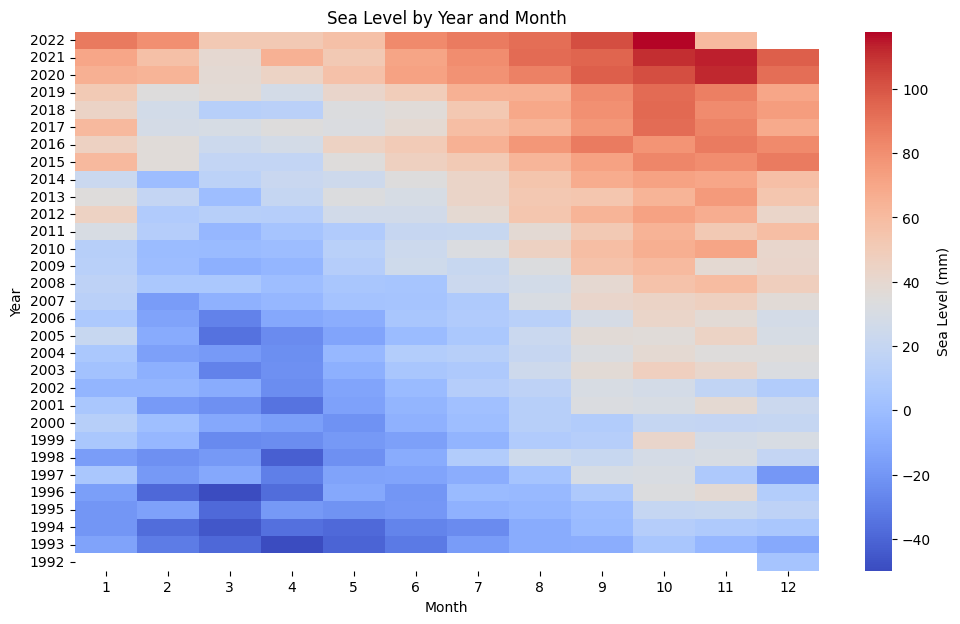

In [ ]:
heatmap_data = merged_df.pivot_table(values='Sea_Level', index='Year', columns='Month').sort_index(ascending=False)
sns.heatmap(data=heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Sea Level (mm)'})
plt.title('Sea Level by Year and Month')
plt.show()

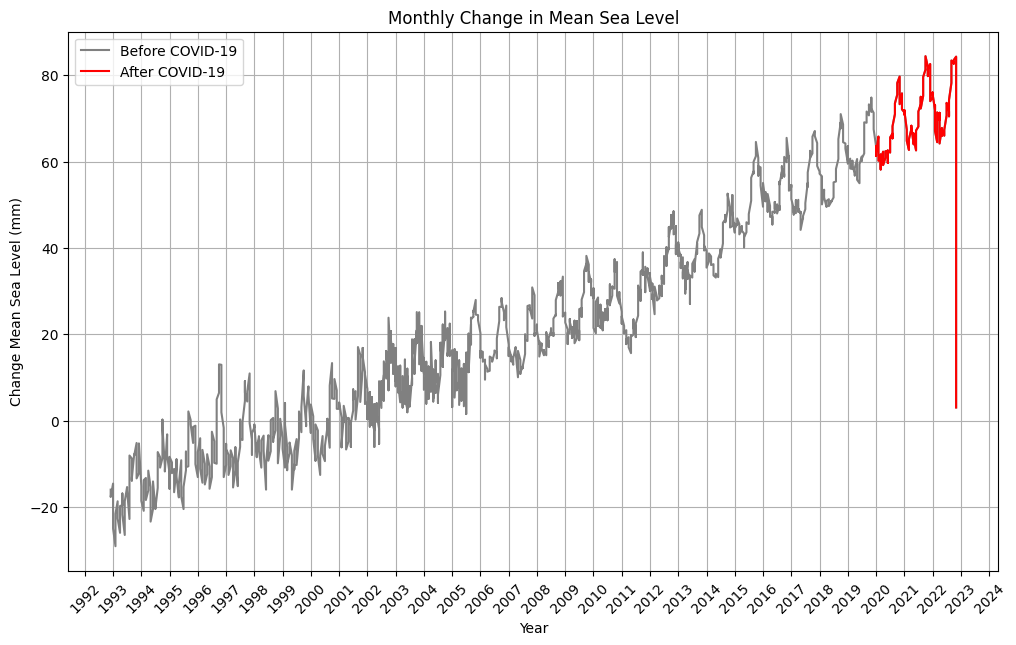

In [ ]:
sea_level_cleaned['Year_Month'] = pd.to_datetime(sea_level_cleaned['Year'].astype(
    str) + '-' + sea_level_cleaned['Month'].astype(str))
sea_level_world = sea_level_cleaned[sea_level_cleaned['Measure'] == 'World']

# Create a boolean mask for dates after 2019-12-01
mask = sea_level_world['Year_Month'] > pd.to_datetime('2019-12-01')

# Plot all data with a lighter color
plt.plot(sea_level_world['Year_Month'], sea_level_world['Value'],
         label='Before COVID-19', color='gray')

# Use boolean mask to plot data after 2019-12-01 with a different color
plt.plot(sea_level_world.loc[mask, 'Year_Month'],
         sea_level_world.loc[mask, 'Value'], label='After COVID-19', color='red')

plt.title('Monthly Change in Mean Sea Level')
plt.xlabel('Year')
plt.ylabel('Change Mean Sea Level (mm)')
plt.legend()

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Rotate x-axis labels
plt.xticks(rotation=45)

plt.grid(True)
plt.show()

The line plot above illustrates the monthly changes in the mean sea level worldwide from December 1992 to November 2022. It specifically focuses on the post-COVID-19 period to analyze the potential impact of the pandemic on sea level fluctuations.

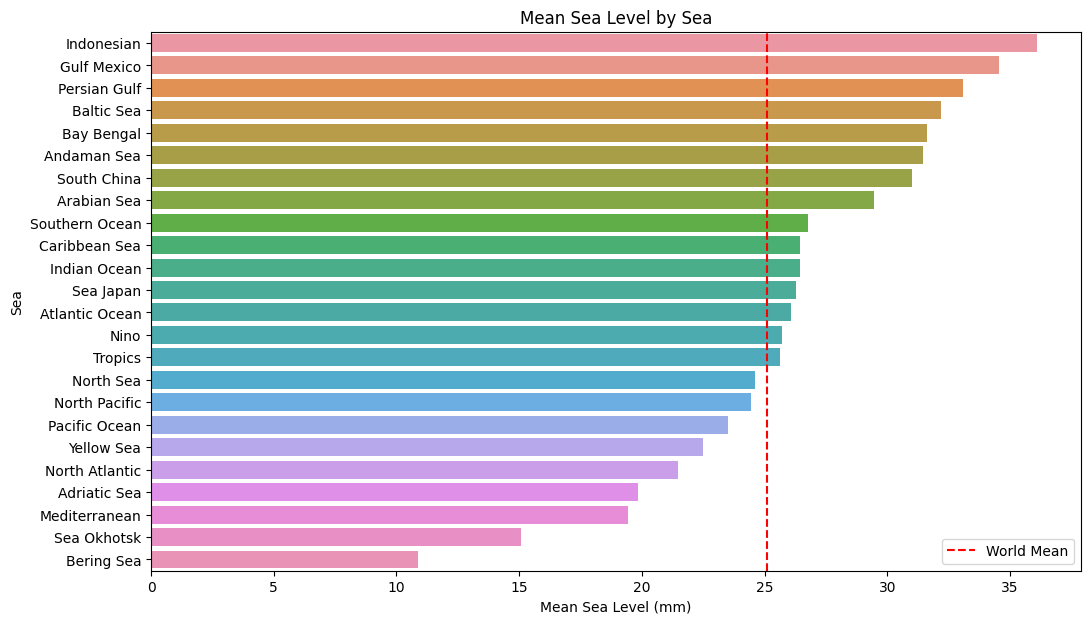

In [ ]:
sea_level_by_year = (sea_level_cleaned
                     [sea_level_cleaned['Measure'] != 'World']
                     .groupby('Measure')
                     [['Value']]
                     .mean()
                     .reset_index())
mean_sea_level_world = (sea_level_cleaned
                        .loc[sea_level_cleaned['Measure'] == 'World', 'Value']
                        .mean(numeric_only=None))

sns.barplot(x='Value', y='Measure',
            data=sea_level_by_year.sort_values('Value', ascending=False))
plt.axvline(x=mean_sea_level_world, color='red',
            linestyle='--', label='World Mean')

plt.title('Mean Sea Level by Sea')
plt.xlabel('Mean Sea Level (mm)')
plt.ylabel('Sea')
plt.legend()

plt.show()

The bar chart above illustrates the average monthly change in sea level across different oceans from December 1992 to November 2022, with a comparison to the `World Mean` measure.

### Hypothesis Test

To perform a hypothesis test on whether the sea level is rising or not based on the given table, we decided use a statistical test; linear regression analysis.

- **Null Hypothesis ($H_0$)**: The sea level is not rising (slope of the linear regression line is zero).
- **Alternative Hypothesis ($H_1$)**: The sea level is rising (slope of the linear regression line is non-zero).

In [ ]:
# Extracting the relevant columns
sea_level_data = sea_level_world[['Year', 'Value']]

# Perform linear regression
# Adding a constant term for the intercept
X = sm.add_constant(sea_level_data['Year'])
y = sea_level_data['Value']
model = sm.OLS(y, X)
results = model.fit()

# Extract slope and p-value
slope = results.params['Year']
p_value = results.pvalues['Year']

# Print regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                 1.502e+04
Date:                Wed, 31 May 2023   Prob (F-statistic):               0.00
Time:                        22:53:48   Log-Likelihood:                -4854.0
No. Observations:                1426   AIC:                             9712.
Df Residuals:                    1424   BIC:                             9723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6072.3960     49.756   -122.043      0.0

Based on the OLS regression results, the coefficient for the `Year` variable is **3.0367**, and it is statistically significant (`p-value` < **0.05**). This indicates that there is a positive relationship between the `Year` variable (representing time) and the `Value` variable (sea level).

The `R-squared value` of **0.913** suggests that the model explains approximately **91.3%** of the variance in the sea level data.

Therefore, we can conclude that there is strong evidence to support the hypothesis that the sea level is rising over time based on the analysis conducted. The coefficient estimate of **3.0367** implies that, on average, the sea level increases by approximately **3.0367** units per year.

In [ ]:
# Hypothesis testing
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. Sea level is rising.")
else:
    print("Fail to reject the null hypothesis. No significant evidence of sea level rise.")

Reject the null hypothesis. Sea level is rising.


# Ethics & Privacy

1. Question asked: The question itself focuses on understanding the impact of the COVID-19 pandemic on global warming. This is a relevant and important topic that can contribute to discussions on climate change mitigation strategies and policy-making.

2. Data collection: The data used in the analysis was publicly available and obtained from reliable sources such as the International Monetary Fund (IMF) and the National Oceanic and Atmospheric Administration (NOAA). Using reputable sources ensures data quality and reliability.

3. Privacy protection: The data used did not contain any personally identifiable information, ensuring privacy protection. This protects the confidentiality and anonymity of individuals contributing to the dataset.

4. Bias in data: While efforts were made to use reliable sources, it's important to acknowledge that data on greenhouse gas emissions and their impacts can be subject to various biases. For example, certain regions or sectors may have more comprehensive monitoring systems, potentially leading to uneven representation of emissions. Additionally, data from the COVID-19 period may reflect unique circumstances, such as reduced industrial activity and transportation, which may not be representative of long-term trends.

5. Analysis: The analysis employed a statistical technique, linear regression, to examine the relationship between the variables of interest. This is a common and widely accepted method in data analysis. By stating the null and alternative hypotheses, and performing hypothesis testing, the analysis aimed to provide objective and statistically sound conclusions.

6. Post-analysis interpretation: Transparency and accuracy in reporting the results were prioritized to ensure responsible communication of findings. By providing clear explanations of the statistical measures, such as coefficient values, p-values, and R-squared values, the analysis aimed to facilitate a comprehensive understanding of the results.

During the analysis, no missing values were encountered, eliminating the need for imputation techniques. Additionally, we combined relevant datasets to enhance the accuracy and predictive power of our models. By integrating multiple datasets, we aimed to capture a comprehensive understanding of the relationship between pandemic-related lockdowns, greenhouse gas emissions, and their impact on global temperature increase and sea level rise.

By considering these ethical considerations throughout the data science process, the analysis aimed to provide reliable, unbiased, and transparent insights into the impact of the COVID-19 pandemic on global warming, specifically in relation to changes in greenhouse gas emissions, global temperature increase, and sea level rise.

# Conclusion & Discussion

This project examined the impact of the COVID-19 pandemic on global warming, specifically focusing on the relationship between overall CO2 concentration and increase of global temperature and sea level. The findings of the analysis in this project provide clear evidence that both temperature anomalies and sea levels are continuing to rise during the COVID-19 pandemic.

Despite the initial hypothesis of a potential decrease in CO2 concentration during the pandemic due to pandemic-related lockdowns, the analysis revealed that overall CO2 concentration remained on an upward trend. This indicates that the temporary reduction in emissions during the pandemic was not sufficient to reverse the ongoing increase in greenhouse gas levels, and then we decided to analyze the impact of overall CO2 concentration to the global temperature increase and sea level rise.

The correlation analysis confirmed the strong positive relationship between CO2 concentration and both temperature anomalies and sea level rise. Higher CO2 concentrations were consistently associated with increased global temperature anomalies and a rise in sea levels over time. The analysis of temperature anomalies demonstrated a persistent upward trend, indicating ongoing global warming. Similarly, the analysis of sea level data revealed a continuous rise in sea levels. These observations emphasize the need for urgent action to mitigate greenhouse gas emissions and address the challenges of climate change.

In conclusion, the findings of our project highlight the critical importance of sustained efforts to reduce CO2 emissions and combat global warming. The COVID-19 pandemic, while not leading to a significant decrease in overall CO2 concentration, serves as a reminder of the urgent need for effective climate action. Continued commitment to emission reduction strategies is essential to mitigate the long-term impacts of climate change and ensure a sustainable future for our planet.

It is important to acknowledge the limitations of this study, including the focus on a specific time period and the reliance on available data sources. Further research could explore the long-term effects of the pandemic on emissions and climate change, as well as investigate regional variations and the differential impacts on different socio-economic groups.

# Team Contributions

All team members made significant and valuable contributions to each section of the project. Our team worked together from the initial brainstorming phase to the final analysis, ensuring a comprehensive and cohesive research study.

During the brainstorming phase, the team collectively developed the research question, taking into account the relevance and feasibility of the topic. Through open discussions and sharing of ideas, we arrived at a focused research question that formed the basis of the project.

In the data collection phase, the team collaborated in finding and sourcing the necessary datasets from reliable sources on the internet. Working together, we ensured the inclusion of relevant data that would address the research question and provide meaningful insights.

At the data cleaning phase, Leica cleaned the `global_land_and_ocean_temp_anomalies` dataset, Xuewen cleaned the `Change_in_Mean_Sea_Levels` dataset, Eddie cleaned the `Atmospheric_CO2_Concentrations` dataset, and Yuxuan merged all three cleaned dataset together. 

During the data analysis & results (EDA) phase, each team member actively participated in generating graphs, conducting statistical tests, and analyzing the results. Collaborative discussions were held to interpret the findings and draw meaningful conclusions from the data.

When finalizing our project, Eddie summarized the project in the `Overview` section, Xuewen examined the project for the `Ethics & Privacy` section, Leica concluded the result and potential improvement of this project in the `Conclusion & Discussion` section, and Yuxuan proof read our final project.

Furthermore, the team members provided feedback and constructive criticism to improve the quality of the analysis at each stage. Through regular meetings and communication, the team maintained a cohesive workflow, ensuring that all members were informed and involved in the decision-making process.

In summary, each member of our team played an integral role in the project, contributing to all aspects of the research. The collective effort in brainstorming, data exploration, cleaning, analysis, and interpretation led to a comprehensive and insightful study. The collaborative approach fostered a supportive and inclusive environment, allowing the team to leverage individual strengths and produce a high-quality project.